In [25]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Setting up functions

def csv_opener(csv_file):
    '''Opens a csv file passed to the function and returns it as a DataFrame.'''
    reader = pd.read_csv(csv_file)
    return reader 


def stock_line_chart(df, company_stock, y_min, y_max):
    '''Pass this function a DataFrame, the name of the company, y axis min limit and y axis max limit.'''
    
    '''No legend or x margins.'''
    df.set_index('Date').plot(title=company_stock, legend=False, ylim=(y_min, y_max))
    plt.ylabel('Stock Price')
    plt.margins(x=0)
    return plt.show()
    

# Open the GPN csv file
historical_prices = csv_opener('GPN.csv')
historical_prices


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-13,167.800003,168.589996,165.899994,167.520004,166.776489,2341600
1,2019-09-16,166.270004,167.899994,164.919998,166.080002,165.342865,1312300
2,2019-09-17,167.050003,171.559998,162.190002,163.740005,163.013275,10914000
3,2019-09-18,164.250000,165.690002,161.539993,164.350006,163.620544,3500300
4,2019-09-19,164.080002,166.350006,162.509995,162.679993,161.957962,3066200
...,...,...,...,...,...,...,...
247,2020-09-04,176.889999,178.889999,169.580002,172.559998,172.358612,2673400
248,2020-09-08,168.929993,171.979996,166.240005,167.089996,166.894989,1990800
249,2020-09-09,169.130005,170.940002,165.990005,169.149994,169.149994,1048900
250,2020-09-10,169.949997,173.960007,167.809998,168.190002,168.190002,1297800


In [27]:
# Clean up the data

# Remove columns we don't need
historical_prices.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1, inplace = True)

# Rename Adj Close to Stock Prices
historical_prices.rename(columns = {'Adj Close':'GPN Stock'}, inplace = True)


# Change Stock Prices to two decimal places
historical_prices['GPN Stock'] = historical_prices['GPN Stock'].round(2)
historical_prices



,Date,GPN Stock
0,2019-09-13,166.78
1,2019-09-16,165.34
2,2019-09-17,163.01
3,2019-09-18,163.62
4,2019-09-19,161.96
...,...,...
247,2020-09-04,172.36
248,2020-09-08,166.89
249,2020-09-09,169.15
250,2020-09-10,168.19


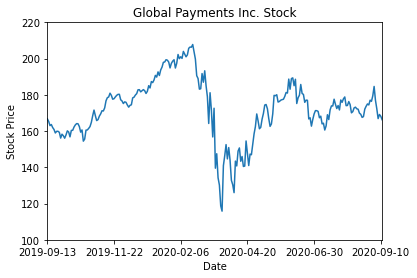

In [28]:
# Plot the GPN stock price history
stock_line_chart(historical_prices, 'Global Payments Inc. Stock', 100, 220)




In [29]:
# Calculations

# Calculate stock returns
returns = historical_prices['GPN Stock'].pct_change(fill_method = 'ffill')

# Take care of missing numbers
returns.dropna(how='any', inplace=True)

# Get average daily returns
avg_daily_return = np.mean(returns)
print('GPN stock average daily return:', avg_daily_return)

# Get standard deviation of returns
vol = returns.std()
print('GPN stock volatility of returns:', vol)

# Get the last price
last_price = historical_prices['GPN Stock'].iloc[-1]
print('The last price collected from the GPN stock:', last_price)

GPN stock average daily return: 0.0005364310826340863
GPN stock volatility of returns: 0.03327052773301623
The last price collected from the GPN stock: 166.27


In [30]:
# Capital Asset Pricing Model

risk_free_rate = .0011
beta = 1.10
expected_market_return = .17

expected_return = risk_free_rate + beta*(expected_market_return - risk_free_rate)

print('CAPM:', round(expected_return, 3))

expected_price = last_price * (1 + expected_return)
print('price in one year:', round(expected_price, 2))

CAPM: 0.187
price in one year: 197.34


In [31]:
# Brownian Motion class setup

# Create Brownian_Motion class and add methods
class Brownian_Motion:
    '''Contains __init__ function with self, drift, volatility, delta_time, and start_price methods and time_step function with self method and Brownian Motion calculations.'''

    def __init__(self, drift, volatility, delta_time, start_price):
        '''Contains self, drift, volatility, delta_time, and start price methods for Brownian Motion calculation.'''
        self.drift = drift
        self.volatility = volatility
        self.delta_time = delta_time
        self.current_price = start_price
        self.asset_prices = [start_price]
        
           
    def time_step(self):
        '''Contains Brownian Motion calculations and generates a new price based on where we are in the loop.'''
        delta_Brownian = np.random.normal(0, np.sqrt(self.delta_time))
        delta_price = self.drift * self.delta_time * self.current_price + \
        self.volatility * self.current_price * delta_Brownian
        self.asset_prices.append(self.current_price + delta_price)
        self.current_price = self.current_price + delta_price
        


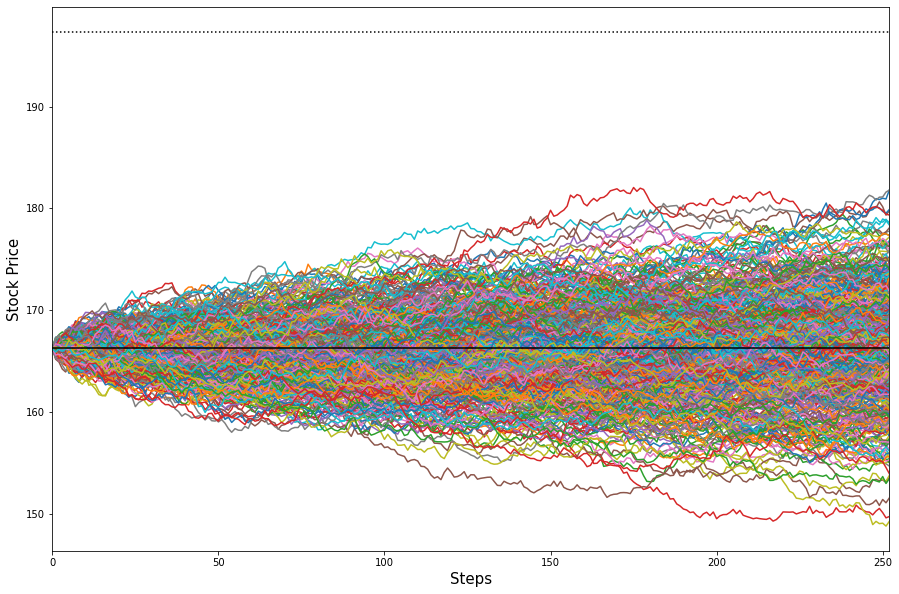

In [32]:
# Monte Carlo Method

#Set up number of simulations and number of days to be projected
num_simulations = 500
num_days = 252
delta_time = 1/num_days
plt.figure(figsize=(15,10))

# for loop in range of desired number of Monte Carlo simulations
for sim in range(num_simulations):
    processes = []
    
# nested for loop to append Brownian_Motion class to processes list
    for i in range(0, 100):
        processes.append(Brownian_Motion(avg_daily_return, vol, delta_time, last_price))
        
# breaks the loop when delta_time hits 252/252
    for process in processes:
        tte = 1
        while((tte - process.delta_time) > 0):
            process.time_step()
            tte = tte - process.delta_time
            
            
# Plot the Graph
    plt.plot(processes[0].asset_prices)
plt.margins(x=0)
plt.ylabel('Stock Price', fontsize=15)
plt.xlabel('Steps', fontsize=15)
plt.axhline(y=last_price, color='k',linestyle='-')
plt.axhline(y=expected_price, color='k',linestyle=':')


plt.show()